Name: Dheeraj Kumar Ambedkar  \n
School: CDS  \n


In [ ]:
import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

2.17.1


In [ ]:
import os
import glob
import PIL
from PIL import Image

In [ ]:
from google.colab import drive
import glob

# Mount Google Drive
drive.mount('/content/drive')






Mounted at /content/drive


In [ ]:
# Load the saved data from Google Drive
X_train_std = np.load("/content/drive/MyDrive/Processed_data/X_train_std.npy")
y_train = np.load("/content/drive/MyDrive/Processed_data/y_train.npy")
X_test_std = np.load("/content/drive/MyDrive/Processed_data/X_test_std.npy")
y_test = np.load("/content/drive/MyDrive/Processed_data/y_test.npy")
y = np.load("/content/drive/MyDrive/Processed_data/y.npy")

In [ ]:
# Retrieve the InceptionResNetV2 model from Keras

InceptionResNetV2_model =keras.applications.InceptionResNetV2()

225209952/225209952 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Take only the feature extractor part

base_model = keras.applications.InceptionResNetV2(weights='imagenet',
                                                  include_top=False)



219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = keras.layers.Dropout(0.15)(x)
output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model_TL_3 = keras.models.Model(inputs=[base_model.input], outputs=[output_])

In [ ]:
model_TL_3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
callbacks_TL_3 = [
    keras.callbacks.ModelCheckpoint("bestTL_3.weights.h5", monitor='val_accuracy',
                                    save_weights_only=True, save_best_only=True)
]

# Train the model
history_TL_3 = model_TL_3.fit(x=X_train_std, y=y_train, epochs=10,
    validation_split=0.1, batch_size=16, callbacks=callbacks_TL_3)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1116s 36s/step - accuracy: 0.8566 - loss: 0.3729 - val_accuracy: 0.5200 - val_loss: 454.2865
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 985s 35s/step - accuracy: 0.9919 - loss: 0.0907 - val_accuracy: 0.5200 - val_loss: 233.0844
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 981s 35s/step - accuracy: 0.9873 - loss: 0.0426 - val_accuracy: 0.8000 - val_loss: 2.0438
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 982s 35s/step - accuracy: 0.9986 - loss: 0.0033 - val_accuracy: 0.5800 - val_loss: 15.7359
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 966s 34s/step - accuracy: 0.9967 - loss: 0.0046 - val_accuracy: 0.6800 - val_loss: 3.3186
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1012s 36s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9200 - val_loss: 0.2272
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 986s 35s/step - accuracy: 1.0000 - loss: 7.5461e-04 - val_accuracy: 0.9800 - val_loss: 0.1159
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1037s 35s/step - accuracy: 1.0000 - loss: 1.4654e-04 - 

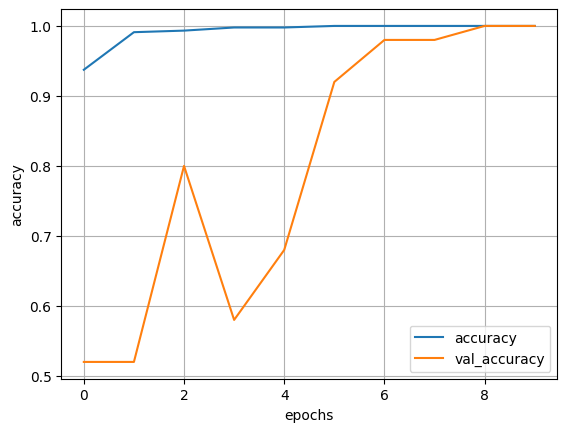

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL_3.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_TL, testAccuracy_TL = model_TL_3.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

6/6 ━━━━━━━━━━━━━━━━━━━━ 99s 15s/step - accuracy: 1.0000 - loss: 4.0175e-04
Test-loss: 0.000671, Test-accuracy: 1.000000


In [ ]:
model_TL_3.load_weights("bestTL_3.weights.h5")

testLoss_TL, testAccuracy_TL = model_TL_3.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

6/6 ━━━━━━━━━━━━━━━━━━━━ 93s 15s/step - accuracy: 1.0000 - loss: 0.0017
Test-loss: 0.002801, Test-accuracy: 1.000000


In [ ]:
y_proba = model_TL_3.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

6/6 ━━━━━━━━━━━━━━━━━━━━ 109s 16s/step
[0 0 0 2 1 1 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 2 1 1 2 0 1
 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 2 1 1 2 1 1 2 0 0 0 0 2
 0 1 0 0 2 1 0 0 0 1 0 2 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 1 1 0 1 2 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 2 0 2
 0 1 2 1 0 2 1 1 0 0 2 0 1 1 1 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[75,  0,  0],
       [ 0, 75,  0],
       [ 0,  0, 16]])

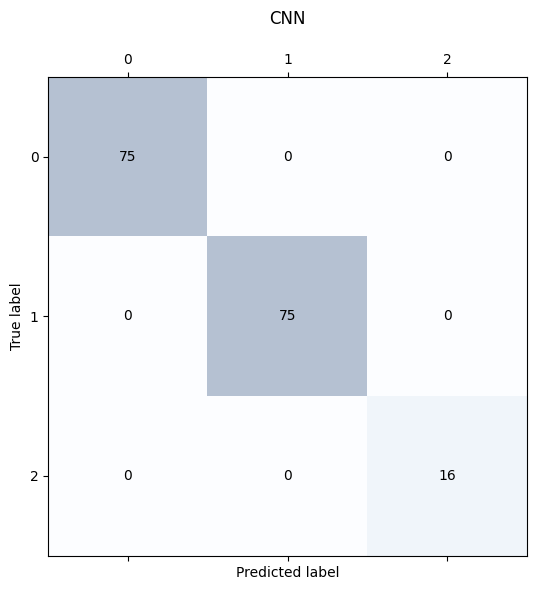

{0, 1, 2}
['Motorbikes' 'airplanes' 'schooner']


In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

print(set(y))
print(lEncoder.classes_)

In [ ]:
!pip install pandas

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  1.0
Recall:  1.0
F1-score:  1.0






In [ ]:
# Saves the best model obtained
model_TL_3.save('/content/drive/MyDrive/Models/InceptionResNetV2_TransferLearning_Best_Model.h5')

In [ ]:
from numpy import save

save('/content/drive/MyDrive/Models/X_train_std.npy', X_train_std)
save('/content/drive/MyDrive/Models/X_test_std.npy', X_test_std)

save('/content/drive/MyDrive/Models/y_train.npy', y_train)
save('/content/drive/MyDrive/Models/y_test.npy', y_test)